# Sayoojkrishna J
Roll No: 48

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import math
from IPython.display import Audio
from collections import OrderedDict

orgAudio=r"C:\Users\sayoo\OneDrive\Desktop\TunePocket-Level-Up-Game-Sound-5.mp3"
y,sr=librosa.load(orgAudio)
y=y+1
Audio(data=orgAudio,autoplay=False)
print(sr)
print(min(y))


22050
0.08151138


In [2]:
Audio(data=orgAudio,autoplay=False)

1.9217762


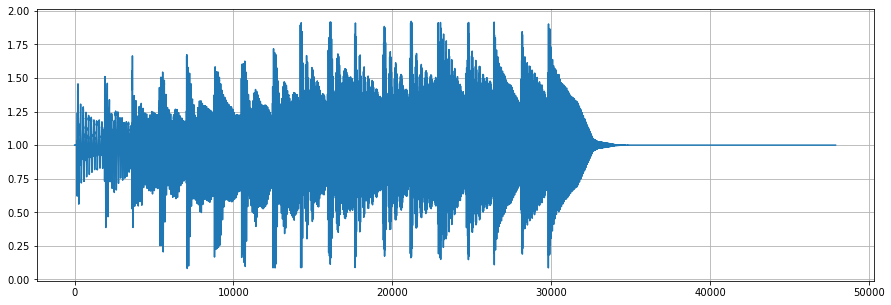

In [3]:
plt.figure(figsize=(15,5))
plt.plot(y)
# plt.xlim(7200,7300)
plt.grid(True)
print(max(y))

def quant(L,S):                 #quant is function with arguments L and S
    Snew=(np.floor(S*L/(max(S))))*(max(S)/L)  #L is the number of levels of quantization,S the signal to be quantised
    L=int(L)
    N=np.log2(L)

    Snew1=(np.floor(S*L/max(S)))
    S_new=[int(i) for i in Snew1]
    #sym_y=["S"+str(i) for i in S_new]
    
    return Snew,S_new

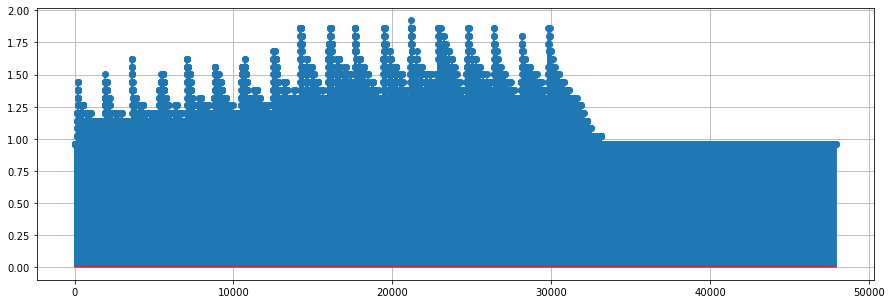

In [4]:
ynew=quant(2**5,y)[0]

plt.figure(figsize=(15,5))
plt.stem(ynew)
plt.grid(True)

In [5]:
y_new=ynew*32/(max(ynew)+0.00001)
Spcm=np.array([(int(i)) for i in y_new])
print((Spcm))

S_pcm=[0]*len(Spcm)
for i in range(len(Spcm)):
    S_pcm[i]=bin(Spcm[i])[2:].zfill(5)
S_pcm=np.array(S_pcm)
print("32 level binary encoded signal:",S_pcm)
print(set(S_pcm))

[15 15 15 ... 15 15 15]
32 level binary encoded signal: ['01111' '01111' '01111' ... '01111' '01111' '01111']
{'11111', '00100', '11010', '00111', '01010', '10101', '01110', '01000', '11001', '00011', '00010', '10100', '11101', '01011', '00101', '00000', '11000', '10111', '10001', '11011', '10011', '11110', '01100', '10010', '00001', '11100', '01111', '01001', '00110', '01101', '10110', '10000'}


In [6]:
def convert_list_elements(lst):
    converted_lst = []
    for num in lst:
        if num < 10:
            converted_lst.append(num)
        else:
            converted_lst.append(chr(ord('A') + num - 10))
    return converted_lst

Spcm_sym=convert_list_elements(Spcm)
print(Spcm_sym) # message signal converted to Symbols

['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'G', 'G', 'F', 'F', 'E', 'E', 'E', 'D', 'D', 'C', 'B', 'B', 'B', 'C', 'D', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'E', 'D', 'B', 'A', 9, 9, 9, 'A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'J', 'J', 'I', 'I', 'H', 'G', 'G', 'F', 'F', 'E', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'L', 'M', 'M', 'M', 'M', 'L', 'K', 'J', 'J', 

In [7]:
string_sig = ''.join(str(elem) for elem in Spcm_sym)


In [8]:
#Huffman encoder
from collections import Counter

class Node:
    def __init__(self, freq, symbol=None):
        self.freq = freq
        self.symbol = symbol
        self.left = None
        self.right = None

def huffman_encode(text):
    frequency = Counter(text)
    queue = [Node(freq, symbol) for symbol, freq in frequency.items()]

    while len(queue) > 1:
        queue = sorted(queue, key=lambda node: node.freq)
        left = queue.pop(0)
        right = queue.pop(0)
        parent = Node(left.freq + right.freq)
        parent.left = left
        parent.right = right
        queue.append(parent)
        
    codes = {}
    def generate_codes(node, code=""):
        if node.symbol:
            codes[node.symbol] = code
        else:
            generate_codes(node.left, code + "0")
            generate_codes(node.right, code + "1")

    root = queue[0]
    generate_codes(root)
    encoded_text = ''.join(codes[symbol] for symbol in text)

    return encoded_text, codes

encoded_sym=huffman_encode(string_sig)[1]
encoded_sig=huffman_encode(string_sig)[0]

In [9]:
encoded_sym

{'F': '0',
 '8': '10000',
 'P': '1000100',
 '1': '100010100',
 'V': '10001010100',
 '0': '10001010101',
 'T': '1000101011',
 '4': '10001011',
 '7': '100011',
 'L': '10010',
 '9': '10011',
 'Q': '10100000',
 'R': '101000010',
 '2': '101000011',
 '6': '1010001',
 'N': '101001',
 'B': '10101',
 'C': '10110',
 'D': '10111',
 'K': '11000',
 'A': '11001',
 'H': '11010',
 'O': '1101100',
 '5': '11011010',
 '3': '110110110',
 'U': '1101101110',
 'S': '1101101111',
 'M': '110111',
 'J': '11100',
 'E': '11101',
 'G': '11110',
 'I': '11111'}

In [10]:
encoded_sig=list(encoded_sig)
print(encoded_sig)
encoded_sig.append(0)
encoded_sign=np.array([int(i) for i in encoded_sig])


['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1',

KeyboardInterrupt: 

In [ ]:
encoded_sign

In [ ]:
encoded_sign.size

In [ ]:
encoded_sign=encoded_sign.reshape(int(encoded_sign.size/4),4) #converting signal to 4 sized lists

In [ ]:
#(7,4) hamming coding
def hamming_coder(msg):
    n = 0
    while 2 ** n < len(msg) + n + 1:
        n += 1
    ham_code = [0] * (len(msg) + n)
    j = 0
    for i in np.arange(1, len(ham_code) + 1):
        if math.log2(i) != np.round(math.log2(i)):
            ham_code[i - 1] = msg[j]
            j += 1
    parity_list = []
    for i in range(n):
        parity = 0
        for j in np.arange(2 ** i, len(ham_code) + 1, 2 ** (i + 1)):
            parity ^= ham_code[j - 1]
        parity_list.append(parity)
    j = 0
    for i in np.arange(1, len(ham_code) + 1):
        if math.log2(i) == np.round(math.log2(i)):
            ham_code[i - 1] = parity_list[j]
            j += 1

    return ham_code

In [ ]:
hamming_code=[]
for i in range(len(encoded_sign)):
    hamming_code.append(hamming_coder(encoded_sign[i]))
hamming_code=np.array(hamming_code)


In [ ]:
D1=hamming_code.reshape(-1)
signal1=np.array([1 if i==1 else -1 for i in D1 ])

def sig2gen(Snr_dB,sig1):
    Snr=10**(Snr_dB/10)
    #generating gaussian noise
    noise=np.random.normal(0,np.sqrt(Snr/2),size=len(sig1))+ 1j*np.random.normal(0,np.sqrt(Snr/2),size=len(sig1))
    noise_P=np.var(noise)
    
    #signal power
    signal_P=1
    N=np.sqrt(signal_P/(Snr*noise_P))
    noise=noise*N
    #adding noise to the signal
    sig2=sig1+noise
    
    return sig2

signal2=sig2gen(10,signal1) #snr value 10dB
plt.scatter(signal2.real,signal2.imag)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Received Signal Constellation Diagram,SNR=10dB')


In [ ]:
signal3=np.array([1 if i>0 else -1 for i in signal2])
D2=np.array([1 if i==1 else 0 for i in signal3])

D2n=[]
for i in range(int(len(D2)/7)):
    yy=list(D2[(7*i):(7*i)+7])
    D2n.append(yy)
D2n=np.array(D2n)

In [ ]:
D2n

In [ ]:
def hammig_decoder(received_code):
    p=0
    while 2**p<len(received_code)+1:
        p=p+1
    syn=0
    for i in range(p):
        parity=0
        for j in np.arange(2**i,len(received_code)+1,2**(i+1)):
            parity^=received_code[j-1];
        syn+=parity*2**i
    if syn!=0:
        received_code[syn-1]^=1

    msg=""
    for i in np.arange(1,len(received_code)+1):
        if math.log2(i)!=np.round(math.log2(i)):
            msg+=(str(received_code[i-1]))
    return(msg)

In [ ]:
r_pcm=[]
for i in range(len(D2n)):
    r_pcm.append((hammig_decoder(D2n[i])))
r_pcm=np.array(r_pcm)
print(r_pcm)

In [ ]:
string_dec=''.join([element for element in r_pcm])

def huffman_decode(encoded_text, codes):
    reverse_codes = {code: symbol for symbol, code in codes.items()}

    decoded_text = ""
    current_code = ""
    for bit in encoded_text:
        current_code += bit
        if current_code in reverse_codes:
            symbol = reverse_codes[current_code]
            decoded_text += symbol
            current_code = ""

    return decoded_text

dec_signal=huffman_decode(string_dec,encoded_sym) # signal decoding
dec_signal=list(dec_signal)
decod_signal=np.array([int(i) if i.isdigit() else i for i in dec_signal])
print(decod_signal) 

In [ ]:
def decode_list_elements(lst):
    decoded_lst = []
    for element in lst:
        if isinstance(element, str):
            decoded_lst.append(ord(element) - ord('A') + 10)
        else:
            decoded_lst.append(element)
    return decoded_lst

signal_quant=decode_list_elements(decod_signal)
signal_quant=np.array(signal_quant)
print(signal_quant) # reconstructed signal

In [ ]:
final_signal=signal_quant*2/32

In [ ]:
from IPython.display import Audio
Audio((final_signal),rate=22050)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(final_signal)